In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

In [2]:
# Ustawiamy styl wykresów dla ładniejszego wyglądu
sns.set(style="whitegrid")

# Ścieżka do naszego pliku z danymi
data_path = '../data/retail.dat'

# Wczytujemy dane transakcyjne
# Plik nie ma nagłówka i każda linia to transakcja, a itemy są oddzielone spacją
transactions = []
with open(data_path, 'r') as f:
    for line in f:
        # Usuwamy białe znaki z początku/końca i dzielimy linię na listę itemów
        items = line.strip().split()
        transactions.append(items)

# Sprawdźmy, jak wyglądają pierwsze 3 transakcje
print("Przykładowe transakcje:")
transactions[:3]

Przykładowe transakcje:


[['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29'],
 ['30', '31', '32'],
 ['33', '34', '35']]

In [3]:
# Obliczanie podstawowych statystyk
num_transactions = len(transactions)

# Aby znaleźć unikalne produkty, musimy "spłaszczyć" listę list w jedną listę
# a następnie użyć set() do znalezienia unikalnych wartości.
# itertools.chain.from_iterable to bardzo wydajny sposób na spłaszczenie listy.
all_items = list(itertools.chain.from_iterable(transactions))
unique_items = set(all_items)
num_unique_items = len(unique_items)

# Wyświetlamy wyniki
print("--- Podstawowe Statystyki Zbioru Danych ---")
print(f"Całkowita liczba transakcji: {num_transactions}")
print(f"Całkowita liczba unikalnych produktów: {num_unique_items}")

--- Podstawowe Statystyki Zbioru Danych ---
Całkowita liczba transakcji: 88162
Całkowita liczba unikalnych produktów: 16470


--- 15 Najpopularniejszych Produktów ---
    item  count  support_%
39    39  50675  57.479413
48    48  42135  47.792700
38    38  15596  17.690161
32    32  15167  17.203557
41    41  14945  16.951748
65    65   4472   5.072480
89    89   3837   4.352215
225  225   3257   3.694335
170  170   3099   3.515120
237  237   3032   3.439123
36    36   2936   3.330233
110  110   2794   3.169166
310  310   2594   2.942311
101  101   2237   2.537374
475  475   2167   2.457975


/tmp/ipykernel_60412/2832339332.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support_%', y='item', data=item_counts_df.head(20), palette='viridis')


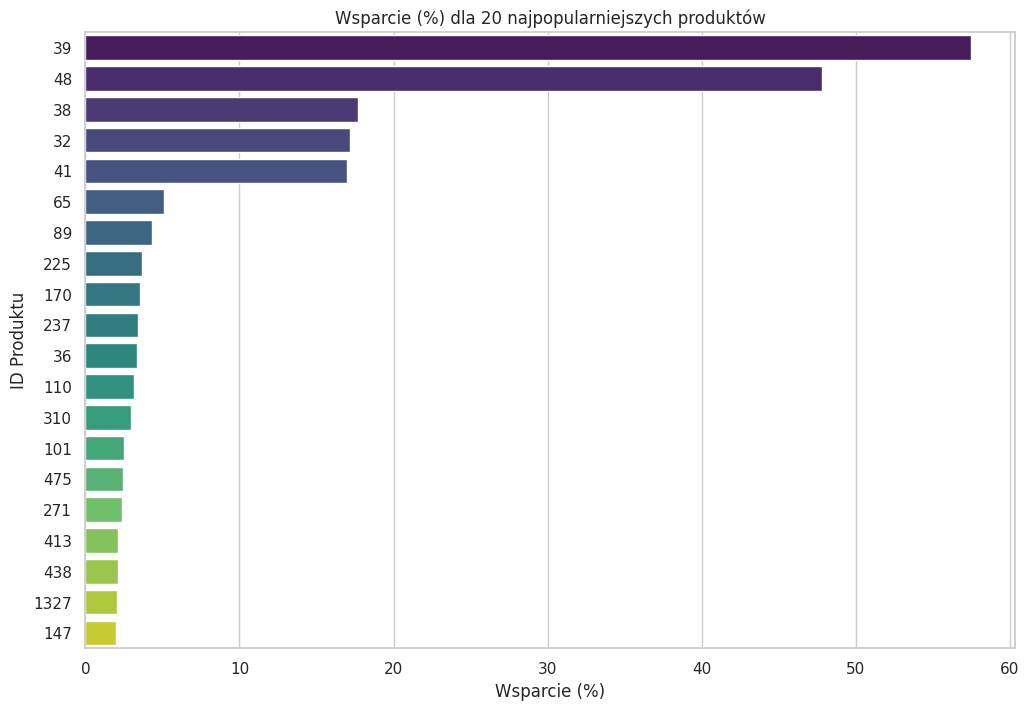

In [5]:
# Używamy Counter do szybkiego zliczenia wystąpień każdego itemu
item_counts = Counter(all_items)

# Konwertujemy wynik do DataFrame w Pandas dla łatwiejszej manipulacji i wizualizacji
item_counts_df = pd.DataFrame(item_counts.items(), columns=['item', 'count'])

# Sortujemy produkty od najpopularniejszych do najrzadszych
item_counts_df = item_counts_df.sort_values(by='count', ascending=False)

# Dodajemy kolumnę ze wsparciem (support) w procentach
item_counts_df['support_%'] = (item_counts_df['count'] / num_transactions) * 100

# Wyświetlamy 15 najpopularniejszych produktów
print("--- 15 Najpopularniejszych Produktów ---")
print(item_counts_df.head(15))

# Wizualizacja rozkładu wsparcia dla 20 najpopularniejszych produktów
plt.figure(figsize=(12, 8))
sns.barplot(x='support_%', y='item', data=item_counts_df.head(20), palette='viridis')
plt.title('Wsparcie (%) dla 20 najpopularniejszych produktów')
plt.xlabel('Wsparcie (%)')
plt.ylabel('ID Produktu')
plt.show()

Successfully loaded transactions

Basic Statistics:
Total number of transactions: 88162
Number of unique items: 16470
Minimum transaction length: 1
Maximum transaction length: 76
Average transaction length: 10.31



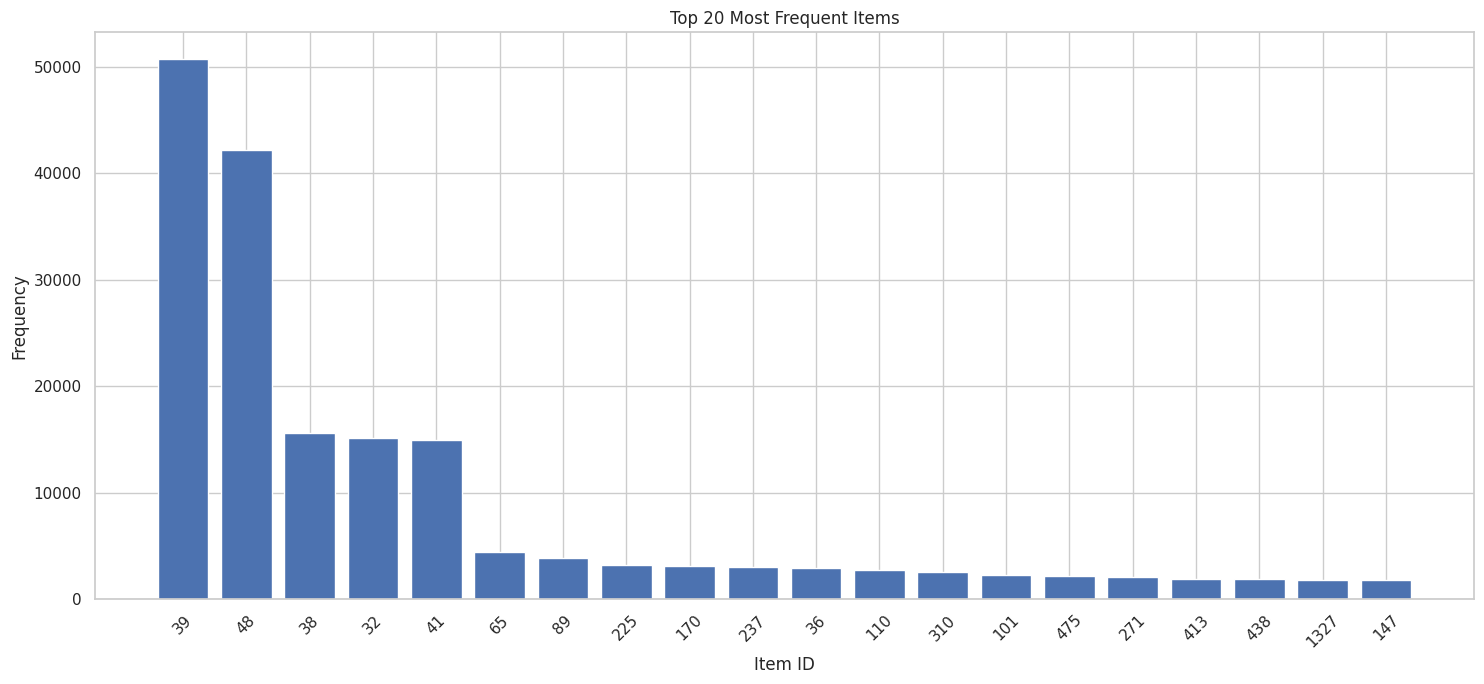


Support Analysis for Regular and Negated Items:

Item 39:
Regular support: 0.5748
Negated support: 0.4252
Sum of supports: 1.0

Item 48:
Regular support: 0.4779
Negated support: 0.5221
Sum of supports: 1.0

Item 38:
Regular support: 0.1769
Negated support: 0.8231
Sum of supports: 1.0

Item 32:
Regular support: 0.1720
Negated support: 0.8280
Sum of supports: 1.0

Item 41:
Regular support: 0.1695
Negated support: 0.8305
Sum of supports: 1.0

Dataset Sparsity: 0.9994
Suggested initial minsup threshold: 0.0100


In [ ]:
# # 1. Data Loading
# def load_transactions(filepath):
#     transactions = []
#     with open(filepath, 'r') as file:
#         for line in file:
#             # Split line by spaces and convert items to integers
#             transaction = [int(item) for item in line.strip().split()]
#             transactions.append(transaction)
#     return transactions

# # Load the data
# transactions = load_transactions('../data/retail.dat')
# print(f"Successfully loaded transactions\n")

# # 2. Basic Statistics
# n_transactions = len(transactions)
# unique_items = set(item for trans in transactions for item in trans)
# n_unique_items = len(unique_items)

# # Transaction length statistics
# trans_lengths = [len(trans) for trans in transactions]
# min_length = min(trans_lengths)
# max_length = max(trans_lengths)
# avg_length = sum(trans_lengths) / len(trans_lengths)

# print("Basic Statistics:")
# print(f"Total number of transactions: {n_transactions}")
# print(f"Number of unique items: {n_unique_items}")
# print(f"Minimum transaction length: {min_length}")
# print(f"Maximum transaction length: {max_length}")
# print(f"Average transaction length: {avg_length:.2f}\n")

# # 3. Frequency Analysis
# item_counts = Counter(item for trans in transactions for item in trans)

# # Get top 20 most frequent items
# top_20_items = dict(sorted(item_counts.items(), key=lambda x: x[1], reverse=True)[:20])

# # Create bar plot
# plt.figure(figsize=(15, 7))
# plt.bar(range(len(top_20_items)), list(top_20_items.values()))
# plt.xticks(range(len(top_20_items)), list(top_20_items.keys()), rotation=45)
# plt.title('Top 20 Most Frequent Items')
# plt.xlabel('Item ID')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

# # 4. Analysis of Negated Literals
# def calculate_support(item_id, transactions, negated=False):
#     """Calculate support for an item or its negation"""
#     count = sum(1 for trans in transactions if (item_id in trans) != negated)
#     return count / len(transactions)

# # Analyze support for some frequent and rare items
# print("\nSupport Analysis for Regular and Negated Items:")
# example_items = list(top_20_items.keys())[:5]  # Take 5 most frequent items

# for item in example_items:
#     regular_support = calculate_support(item, transactions)
#     negated_support = calculate_support(item, transactions, negated=True)
    
#     print(f"\nItem {item}:")
#     print(f"Regular support: {regular_support:.4f}")
#     print(f"Negated support: {negated_support:.4f}")
#     print(f"Sum of supports: {regular_support + negated_support}")

# # Calculate dataset sparsity
# total_possible_items = len(transactions) * len(unique_items)
# actual_items = sum(len(trans) for trans in transactions)
# sparsity = 1 - (actual_items / total_possible_items)

# print(f"\nDataset Sparsity: {sparsity:.4f}")

# # Suggest initial minsup threshold based on data characteristics
# suggested_minsup = max(0.01, min(0.1, 1/len(unique_items)))
# print(f"Suggested initial minsup threshold: {suggested_minsup:.4f}")